<a href="https://colab.research.google.com/github/potatoesAndMolasses/An-lise_Sentimentos_X/blob/main/NLP_Resume_Job_Description_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

In [4]:
pip install nltk

In [5]:
# Base de dados
path = kagglehub.dataset_download("shreya2k3/resume-job-description-matching")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/shreya2k3/resume-job-description-matching/versions/1


['train.csv']

In [6]:
path = '/root/.cache/kagglehub/datasets/shreya2k3/resume-job-description-matching/versions/1'
df = pd.read_csv(path + '/train.csv')
df.head()

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Baixar recursos do NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.data.path.append('/kaggle/input/nltk-data')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [14]:
# Função para limpar o texto
def preprocess_text(text):
    # Transformar o texto para minúsculas
    text = text.lower()

    # Tokenizar o texto
    tokens = word_tokenize(text)

    # Remover stopwords e pontuação, e lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]

    # Reconstruir o texto
    return ' '.join(tokens)

In [15]:
# Aplicar a função preprocess_text nas colunas
df['processed_resume_text'] = df['resume_text'].apply(preprocess_text)
df['processed_job_description_text'] = df['job_description_text'].apply(preprocess_text)

# Verificar as primeiras linhas para ver o resultado
print(df[['resume_text', 'processed_resume_text', 'job_description_text', 'processed_job_description_text']].head())

df.to_csv("dataset_processado.csv", index=False)


                                         resume_text  \
0  SummaryHighly motivated Sales Associate with e...   
1  Professional SummaryCurrently working with Cat...   
2  SummaryI started my construction career in Jun...   
3  SummaryCertified Electrical Foremanwith thirte...   
4  SummaryWith extensive experience in business/r...   

                               processed_resume_text  \
0  summaryhighly motivated sale associate extensi...   
1  professional summarycurrently working caterpil...   
2  summaryi started construction career june 2017...   
3  summarycertified electrical foremanwith thirte...   
4  summarywith extensive experience business/requ...   

                                job_description_text  \
0  Net2Source Inc. is an award-winning total work...   
1  At Salas OBrien we tell our clients that were ...   
2  Schweitzer Engineering Laboratories (SEL) Infr...   
3  Mizick Miller & Company, Inc. is looking for a...   
4  Life at Capgemini\nCapgemini supports all a

<ipython-input-16-746d06b030b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


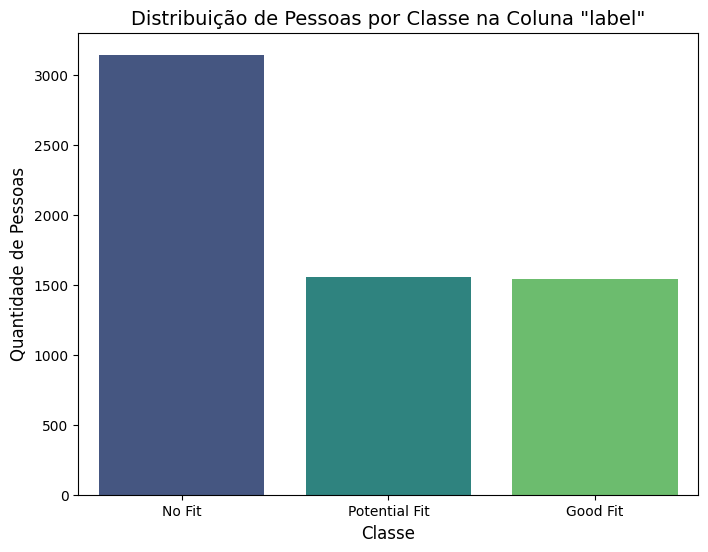

In [16]:
# Contar as ocorrências de cada classe na coluna 'label'
label_counts = df['label'].value_counts()

# Configurar o gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Títulos e rótulos
plt.title('Distribuição de Pessoas por Classe na Coluna "label"', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)


plt.show()

In [17]:
qtd = df.groupby('label').size()
print(qtd)

label
Good Fit         1542
No Fit           3143
Potential Fit    1556
dtype: int64


In [20]:
# Vetorizar os textos com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['processed_resume_text'] + ' ' + df['processed_job_description_text'])

# Dividir a matriz TF-IDF em duas partes: currículos e descrições de vagas
resume_tfidf = tfidf_matrix[:len(df)]
job_description_tfidf = tfidf_matrix[len(df):]  # Corrected slicing

# Calcular similaridade de cosseno entre os textos
cos_sim = cosine_similarity(resume_tfidf, resume_tfidf)

# Exibir a similaridade entre os currículos e as descrições das vagas
print(cos_sim)


[[1.         0.09353355 0.10532032 ... 0.08527887 0.04541556 0.06267739]
 [0.09353355 1.         0.15297918 ... 0.10342079 0.09030099 0.06319154]
 [0.10532032 0.15297918 1.         ... 0.107282   0.06536225 0.04254418]
 ...
 [0.08527887 0.10342079 0.107282   ... 1.         0.04938401 0.22585775]
 [0.04541556 0.09030099 0.06536225 ... 0.04938401 1.         0.02593037]
 [0.06267739 0.06319154 0.04254418 ... 0.22585775 0.02593037 1.        ]]


In [21]:
# Encontrar o índice dos maiores valores fora da diagonal
# Vamos primeiro criar uma cópia da matriz de similaridade e remover a diagonal
cos_sim_no_diag = np.copy(cos_sim)
np.fill_diagonal(cos_sim_no_diag, 0)

# Encontrar os índices dos maiores valores (maior similaridade)
# Vamos encontrar os índices do maior valor de similaridade
max_sim_idx = np.unravel_index(np.argmax(cos_sim_no_diag), cos_sim_no_diag.shape)

# Obter os índices dos currículos e das descrições de vaga mais semelhantes
resume_idx, job_desc_idx = max_sim_idx

# Exibir os textos mais semelhantes
print(f"Currículo mais semelhante ao job description {job_desc_idx}:\n{df['processed_resume_text'].iloc[resume_idx]}")
print(f"\nDescrição de vaga mais semelhante ao currículo {resume_idx}:\n{df['processed_job_description_text'].iloc[job_desc_idx]}")


Currículo mais semelhante ao job description 5153:
qualifications• two year experience data analysis loyola chicago university providing statistical analysis plan generating report table graph proficient r sas.• proficient microsoft office word excel power point.• ability effectively organize manage multiple assignment hard deadlines.• great team player extensive experience skill collaboration communication professional experience09/2016tocurrentdata analyst internenvestnet|secaucus nj • merge spreadsheet different source create compact centralized data platform easy updating data analysis using m excel advanced function formulas.• data cleaning data validation existing spreadsheet promote robust data management platform accurate data entry data analysis.• train employee use pivot table tip trick m excel efficient data entry analysis.07/2013to04/2014research assistantsuny upstate medical university|syracuse ny supervisor drs michael crum david rayome paper self-employment subjective we